# Exercise 1

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

In [3]:
img = cv.imread("images/boat.jpg")
#otsu threshold
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th_img = cv.threshold(gray,0,255,cv.THRESH_OTSU | cv.THRESH_BINARY_INV)[1]

contours, _ = cv.findContours(th_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    if w > 50 and h > 50:  # Filter out small regions
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
show_img("bounding box", img)

# Exercise 2

In [360]:
# Load the image and convert to grayscale
image = cv.imread("images/leaf.jfif")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply thresholding to segment the leaf from the background
_, thresholded = cv.threshold(gray, 130, 255, cv.THRESH_BINARY_INV)

# Define the GUI callback function
def apply_morphology(val):
    kernel_size = cv.getTrackbarPos("Kernel Size", "Morphology")
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Perform morphological operations
    eroded = cv.erode(thresholded, kernel, iterations=1)
    dilated = cv.dilate(thresholded, kernel, iterations=1)
    opened = cv.morphologyEx(thresholded, cv.MORPH_OPEN, kernel)
    closed = cv.morphologyEx(thresholded, cv.MORPH_CLOSE, kernel)

    # Concatenate results side by side for display
    result = np.concatenate((eroded, dilated, opened, closed), axis=1)

    # Display the resulting image
    cv.imshow("Morphology", result)

# Create a GUI window and trackbar
cv.namedWindow("Morphology")
cv.createTrackbar("Kernel Size", "Morphology", 1, 20, apply_morphology)

# Initial call to update display
apply_morphology(0)

# Wait for a key press and close the window
cv.waitKey(0)
cv.destroyAllWindows()

# Exercise 3

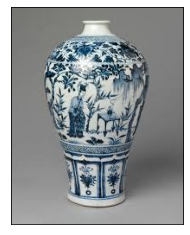

In [350]:
img = cv.imread("images/color_space/porcelain5.jfif")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt_img(img)

In [351]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm

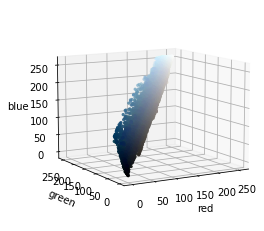

In [352]:
# visualize the pixels in 3D plots (RGB dimensional space)
r, g, b = cv.split(img)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = '3d')

pixel_colors = img.reshape((-1, 3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(), 
            facecolors = pixel_colors, marker = '.')

axis.view_init(elev=10, azim=240)
axis.set_xlabel("red")
axis.set_ylabel("green")
axis.set_zlabel("blue")
plt.show()

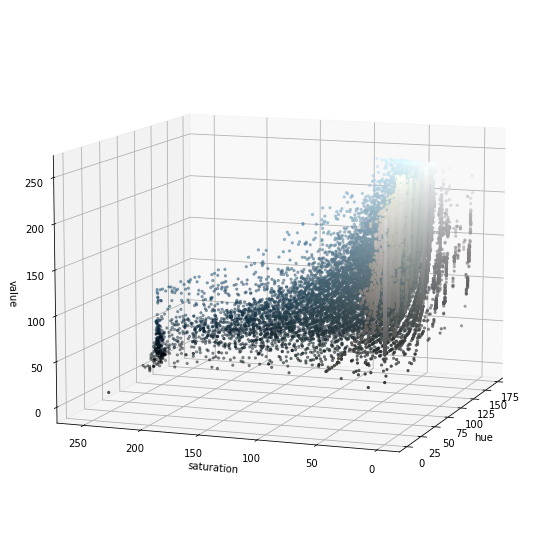

In [355]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)

fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(1, 1, 1, projection = '3d')


axis.scatter(h.ravel(), s.ravel(), v.ravel(), 
            facecolors = pixel_colors, marker = '.')

axis.view_init(elev=10, azim=200) # chg azim to view frm diff angle
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

In [347]:
# set hsv colour range for blue and white
blue_low = (100, 50, 50)
blue_high = (150, 255, 255)

white_low = (0, 10, 140)
white_high = (200, 50, 255)

In [348]:
def color_seg(img, color_low, color_high, color_low2, color_high2, smooth=True):
    """Args:
    img: source img
    color_low, color_high: HSV color tuples
    smooth=Boolean (default:True)"""
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
        
    #HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    #inrange
    mask1 = cv.inRange(img_hsv, color_low, color_high)
    mask2 = cv.inRange(img_hsv, color_low2, color_high2)
    final_mask = cv.bitwise_or(mask1, mask2)
    
    #morphological operations
    final_mask = cv.dilate(final_mask, None, iterations = 2)
    
    
    return cv.bitwise_and(img_ori, img_ori, mask=final_mask)

imgs = []
for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f'images/color_space/porcelain{i}.jfif'))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    imgs.append(img)
    
res = [color_seg(img, blue_low, blue_high, white_low, white_high) for img in imgs]

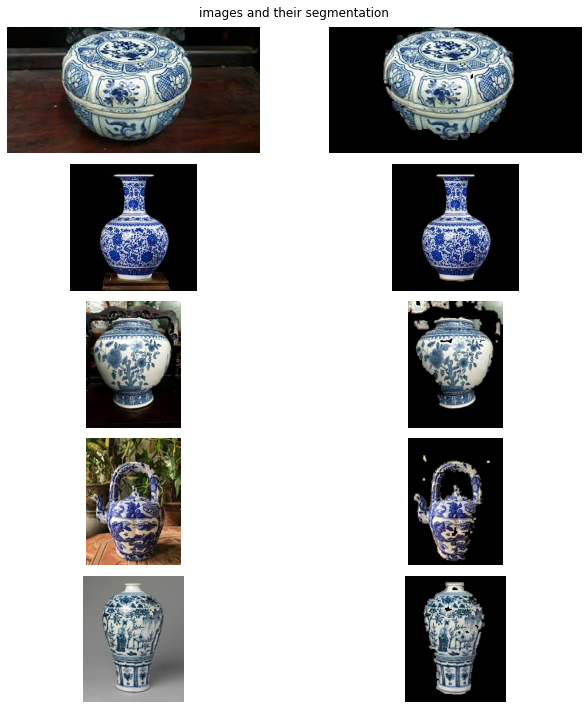

In [349]:
fig, ax = plt.subplots(5, 2, figsize=(10,10))

for i in range (5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis('off')
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
fig.suptitle("images and their segmentation")
plt.tight_layout()
plt.show()